<a href="https://colab.research.google.com/github/AngelTroncoso/s-20-10-data/blob/main/TratamientoSistemico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=0ae47c8fa7797f0eadaa3d7265d0c39c0c3e6cadf92c6f4d4fd61c07c09e9998
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, kruskal
from lifelines import KaplanMeierFitter

# Cargar el dataframe (reemplaza 'archivo.csv' por tu archivo real)
df = pd.read_excel('/content/BASE DE DATOS METS localizacion correg (2).xlsx')

# Verificar datos
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EXPEDIENTE                        466 non-null    int64  
 1   NOMBRE                            466 non-null    object 
 2   EDAD                              466 non-null    int64  
 3   SEXO                              466 non-null    object 
 4   TUMOR PRIMARIO                    466 non-null    object 
 5   SUBTIPO HISTOLOGICO               466 non-null    object 
 6   PERFIL MOLECULAR                  281 non-null    object 
 7   AÑO                               466 non-null    int64  
 8    No. METS                         466 non-null    object 
 9   TAMAÑO                            466 non-null    object 
 10  LOCALIZACIÓN                      466 non-null    object 
 11  CIRUGIA PREVIA                    466 non-null    object 
 12  SRS     

In [3]:
df[df['TRATAMIENTO SISTEMICO'].isnull()]

,EXPEDIENTE,NOMBRE,EDAD,SEXO,TUMOR PRIMARIO,SUBTIPO HISTOLOGICO,PERFIL MOLECULAR,AÑO,No. METS,TAMAÑO,...,CIRUGIA PREVIA,SRS,DOSIS,TECNICA,TRATAMIENTO SISTEMICO,RESPUESTA (CRITERIOS RANO),1ER ESTUDIO DE SEGUIMIENTO X MES,RC,NADIR,RADIONECROSIS
38,232385,IBAÑEZ CRUZ PEDRO,46,M,CANCER DE PULMON,ADENOCARCINOMA ACINAR,NaN,2017,1,21,...,SI,NaN,20 GY,VMAT,NaN,RESPUESTA COMPLETA,5.0,5.0,NaN,ASINTOMATICA
39,232522,GONZALEZ Y ESCARCEGA SILVIA CLEMENTINA,73,F,CANCER DE RIÑON,CARCINOMA DE CÉLULAS CLARAS,NaN,2016,1,29,...,SI,DU,18 GY,VMAT,NaN,ESTABLE,4.0,NaN,4.0,ASINTOMATICA
45,233986,PINTO SOTO SUSANA JUDITH,51,F,CANCER DE MAMA,CARCINOMA DUCTAL INFILTRANTE,NaN,2016,1,21,...,NO,DU,16 GY,CEC,NaN,ESTABLE,3.0,NaN,4.0,ASINTOMATICA
66,239866,HERNANDEZ VELAZQUEZ MARIA EUGENIA,66,F,CANCER DE ENDOMETRIO,CARCINOMA ANAPLÁSICO,NaN,2017,1,36,...,SI,HIPO FX,21 GY / 3,VMAT,NaN,RESPUESTA PARCIAL,4.0,NaN,4.0,ASINTOMATICA
67,239866,HERNANDEZ VELAZQUEZ MARIA EUGENIA,66,F,CANCER DE ENDOMETRIO,CARCINOMA ANAPLÁSICO,NaN,2017,2,17,...,NO,DU,20 GY,VMAT,NaN,RESPUESTA PARCIAL,4.0,NaN,4.0,ASINTOMATICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,301472,TRUEBA REYES JAIME ANTONIO,76,M,CANCER DE PULMON,ADENOCARCINOMA DE CELULAS NO PEQUEÑAS,EGFR+,2024,10,4.8,...,NO,DU,18 GY,VMAT,NaN,RESPUESTA COMPLETA,4.0,4.0,NaN,SINTOMATICO
441,301472,TRUEBA REYES JAIME ANTONIO,76,M,CANCER DE PULMON,ADENOCARCINOMA DE CELULAS NO PEQUEÑAS,EGFR+,2024,11,6,...,NO,DU,18 GY,VMAT,NaN,RESPUESTA COMPLETA,4.0,4.0,NaN,SINTOMATICO
442,301472,TRUEBA REYES JAIME ANTONIO,76,M,CANCER DE PULMON,ADENOCARCINOMA DE CELULAS NO PEQUEÑAS,EGFR+,2024,12,5.1,...,NO,DU,18 GY,VMAT,NaN,RESPUESTA COMPLETA,4.0,4.0,NaN,SINTOMATICO
443,301472,TRUEBA REYES JAIME ANTONIO,76,M,CANCER DE PULMON,ADENOCARCINOMA DE CELULAS NO PEQUEÑAS,EGFR+,2024,13,3.7,...,NO,DU,18 GY,VMAT,NaN,RESPUESTA COMPLETA,4.0,4.0,NaN,SINTOMATICO


In [4]:
A = df.shape[0]
df.dropna(subset=['TRATAMIENTO SISTEMICO'], inplace = True)
B = df.shape[0]
A - B

70

In [5]:
df[df['TRATAMIENTO SISTEMICO'].isnull()]

,EXPEDIENTE,NOMBRE,EDAD,SEXO,TUMOR PRIMARIO,SUBTIPO HISTOLOGICO,PERFIL MOLECULAR,AÑO,No. METS,TAMAÑO,...,CIRUGIA PREVIA,SRS,DOSIS,TECNICA,TRATAMIENTO SISTEMICO,RESPUESTA (CRITERIOS RANO),1ER ESTUDIO DE SEGUIMIENTO X MES,RC,NADIR,RADIONECROSIS


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 465
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   EXPEDIENTE                        396 non-null    int64  
 1   NOMBRE                            396 non-null    object 
 2   EDAD                              396 non-null    int64  
 3   SEXO                              396 non-null    object 
 4   TUMOR PRIMARIO                    396 non-null    object 
 5   SUBTIPO HISTOLOGICO               396 non-null    object 
 6   PERFIL MOLECULAR                  261 non-null    object 
 7   AÑO                               396 non-null    int64  
 8    No. METS                         396 non-null    object 
 9   TAMAÑO                            396 non-null    object 
 10  LOCALIZACIÓN                      396 non-null    object 
 11  CIRUGIA PREVIA                    396 non-null    object 
 12  SRS          

#1. Distribución de los tratamientos sistémicos

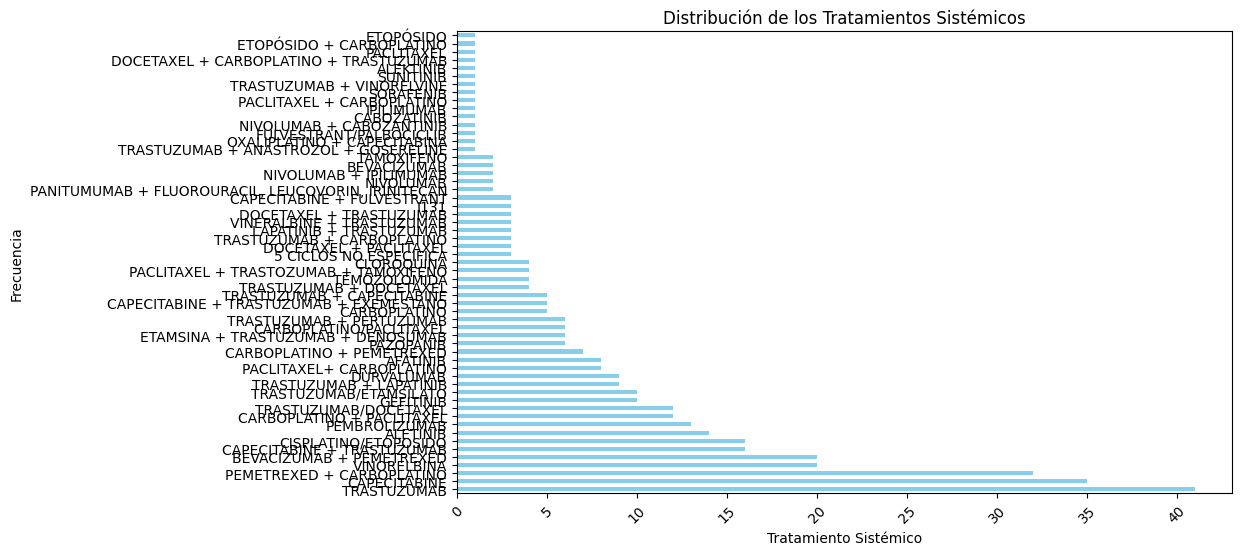

In [7]:
# Conteo y proporción
tratamientos = df['TRATAMIENTO SISTEMICO'].value_counts()
proporcion = df['TRATAMIENTO SISTEMICO'].value_counts(normalize=True)

# Gráfico
plt.figure(figsize=(10, 6))
tratamientos.plot(kind='barh', color='skyblue')
plt.title('Distribución de los Tratamientos Sistémicos')
plt.ylabel('Frecuencia')
plt.xlabel('Tratamiento Sistémico')
plt.xticks(rotation=45)
plt.show()


#2. Relación con la respuesta al tratamiento

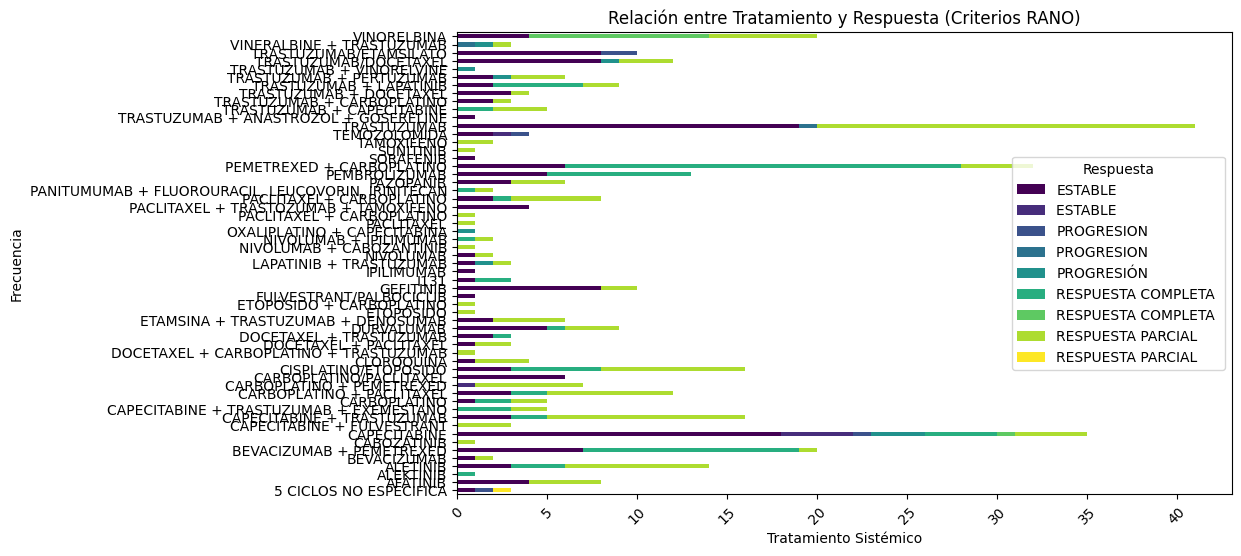

In [8]:
# Agrupar por TRATAMIENTO SISTEMICO y RESPUESTA
respuesta_tratamiento = df.groupby('TRATAMIENTO SISTEMICO')['RESPUESTA (CRITERIOS RANO)'].value_counts().unstack()

# Gráfico de barras apiladas
respuesta_tratamiento.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Relación entre Tratamiento y Respuesta (Criterios RANO)')
plt.ylabel('Frecuencia')
plt.xlabel('Tratamiento Sistémico')
plt.xticks(rotation=45)
plt.legend(title='Respuesta')
plt.show()


#3. Relación con el perfil molecular

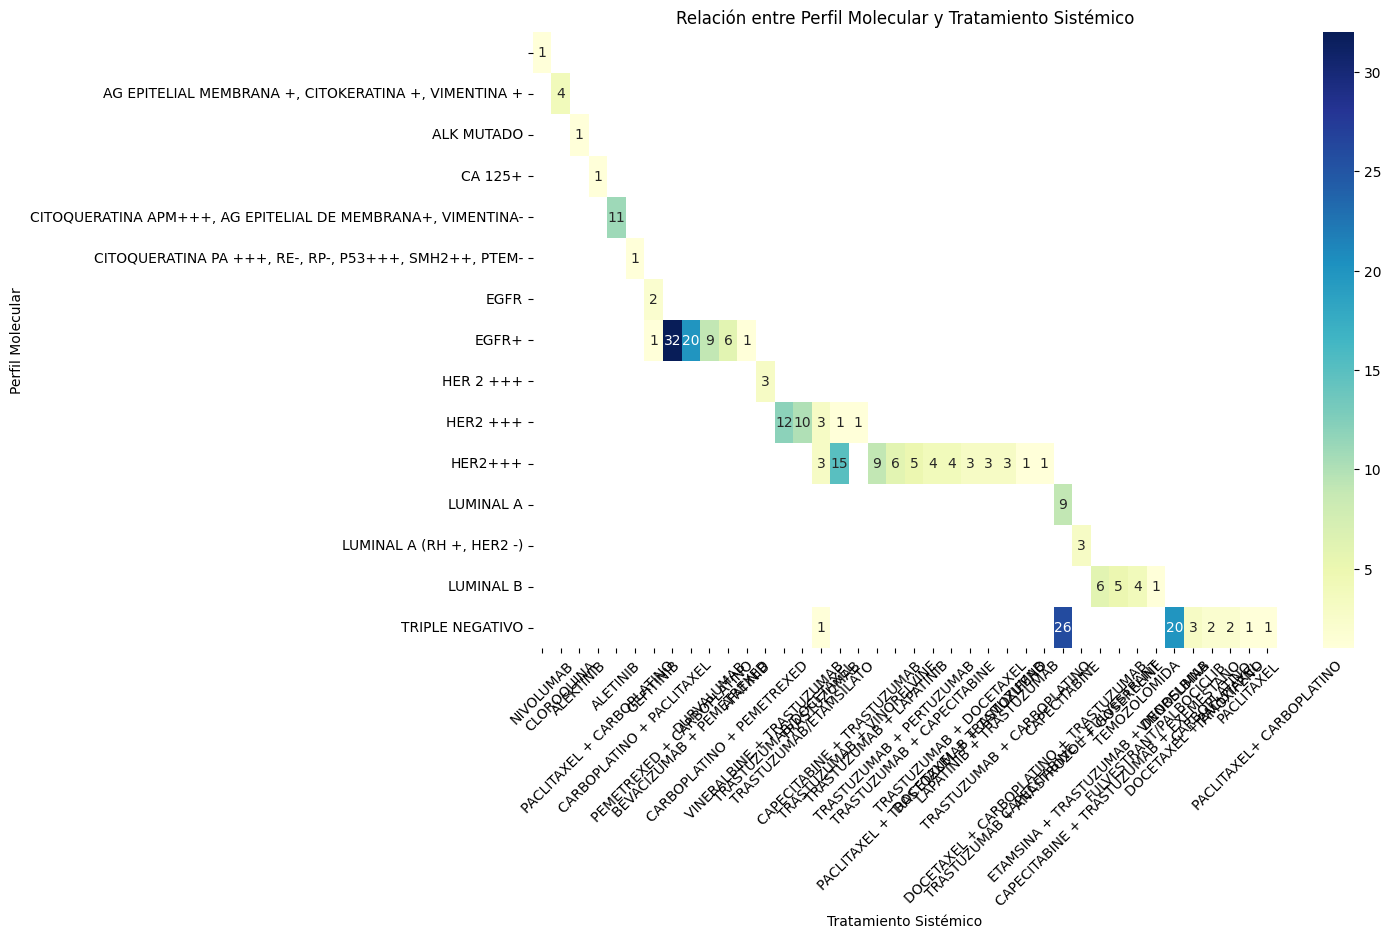

In [9]:
# Agrupar y calcular frecuencias
perfil_tratamiento = df.groupby('PERFIL MOLECULAR')['TRATAMIENTO SISTEMICO'].value_counts().unstack()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(perfil_tratamiento, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Relación entre Perfil Molecular y Tratamiento Sistémico')
plt.xlabel('Tratamiento Sistémico')
plt.ylabel('Perfil Molecular')
plt.xticks(rotation=45)
plt.show()


#4. Relación con la radiocirugía


In [10]:
# Replace values in 'TRATAMIENTO SISTEMICO' column
df['SRS'] = df['SRS'].replace('DU', 'DU ')
df['SRS'] = df['SRS'].replace('HIPO FX', 'HIPOFX')

# Mostrar valores únicos de la columna 'SRS' (suponiendo que se llama así)
print(df['SRS'].unique())

['DU ' 'HIPOFX']


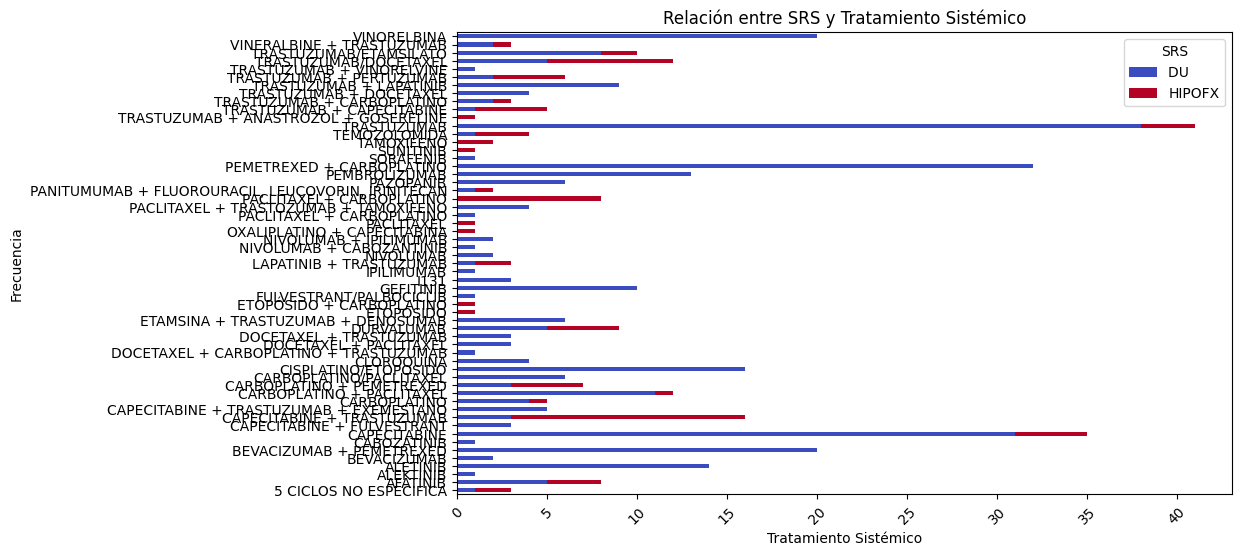

In [11]:
# Relación entre SRS y Tratamiento Sistémico
srs_tratamiento = df.groupby('TRATAMIENTO SISTEMICO')['SRS'].value_counts().unstack()

# Gráfico de barras
srs_tratamiento.plot(kind='barh', figsize=(10, 6), colormap='coolwarm', stacked=True)
plt.title('Relación entre SRS y Tratamiento Sistémico')
plt.ylabel('Frecuencia')
plt.xlabel('Tratamiento Sistémico')
plt.xticks(rotation=45)
plt.legend(title='SRS')
plt.show()
